<a href="https://colab.research.google.com/github/AndrewTing89/Office-Solutions-Recommendation-Report/blob/main/Office_Solutions_Sales_Data_Analysis_Binders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import pandas library.
import pandas as pd

#Import data for analysis and display first 10 lines.
xl=pd.ExcelFile("/content/TableauSalesData.xlsx")
salesData = xl.parse("Orders")
display(salesData.head(10))

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,4919,CA-2016-160304,2016-01-02,2016-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,20877,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,0.0,38.2668
1,4920,CA-2016-160304,2016-01-02,2016-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,20877,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.980,2,0.0,67.2742
2,3074,CA-2016-125206,2016-01-03,2016-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,90045,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,0.0,28.6150
3,8604,US-2016-116365,2016-01-03,2016-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,78207,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2,0.2,-5.2640
4,8605,US-2016-116365,2016-01-03,2016-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,78207,Central,TEC-AC-10002942,Technology,Accessories,WD My Passport Ultra 1TB Portable External Har...,165.600,3,0.2,-6.2100
5,8606,US-2016-116365,2016-01-03,2016-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,78207,Central,TEC-PH-10002890,Technology,Phones,AT&T 17929 Lendline Telephone,180.960,5,0.2,13.5720
6,9494,CA-2016-105207,2016-01-03,2016-01-08,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,74012,Central,FUR-TA-10000617,Furniture,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.850,7,0.0,350.4270
7,9495,CA-2016-105207,2016-01-03,2016-01-08,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,74012,Central,OFF-BI-10004364,Office Supplies,Binders,Storex Dura Pro Binders,11.880,2,0.0,5.3460
8,2898,US-2016-164630,2016-01-04,2016-01-09,Standard Class,EB-13975,Erica Bern,Corporate,United States,Charlotte,...,28205,South,TEC-CO-10000971,Technology,Copiers,Hewlett Packard 310 Color Digital Copier,959.968,4,0.2,119.9960
9,5868,CA-2016-158211,2016-01-04,2016-01-08,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Philadelphia,...,19143,East,OFF-AR-10004078,Office Supplies,Art,Newell 312,4.672,1,0.2,0.5840


In [2]:
#Display sub-cateories, profit and sales for each item in the data set.
subCatProfits = salesData[["Sub-Category","Profit","Sales"]]
print(subCatProfits)

     Sub-Category    Profit    Sales
0       Bookcases   38.2668  173.940
1          Phones   67.2742  231.980
2         Storage   28.6150  114.460
3     Accessories   -5.2640   30.080
4     Accessories   -6.2100  165.600
...           ...       ...      ...
9989      Binders  167.8080  364.800
9990      Storage  -26.7204  152.688
9991    Fasteners    0.5668    3.488
9992     Supplies   -1.3248    5.888
9993      Binders   52.3800  116.400

[9994 rows x 3 columns]


In [3]:
#Group all items up by sub-category, then sum up the profits and sales.
totalSubCatProfits = subCatProfits.groupby(by = "Sub-Category").sum().sort_values(by = "Profit")
print(totalSubCatProfits)

                  Profit        Sales
Sub-Category                         
Tables       -17725.4811  206965.5320
Bookcases     -3472.5560  114879.9963
Supplies      -1189.0995   46673.5380
Fasteners       949.5182    3024.2800
Machines       3384.7569  189238.6310
Labels         5546.2540   12486.3120
Art            6527.7870   27118.7920
Envelopes      6964.1767   16476.4020
Furnishings   13059.1436   91705.1640
Appliances    18138.0054  107532.1610
Storage       21278.8264  223843.6080
Chairs        26590.1663  328449.1030
Binders       30221.7633  203412.7330
Paper         34053.5693   78479.2060
Accessories   41936.6357  167380.3180
Phones        44515.7306  330007.0540
Copiers       55617.8249  149528.0300


In [4]:
#Based off analysis conducted in Tableau, problems in the Binders sub-category were discovered.

#Locate and print all data for all items under the 'Binders' sub-category.
justBinders = salesData.loc[salesData["Sub-Category"]=="Binders"]
print(justBinders.head(10))

    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
7     9495  CA-2016-105207 2016-01-03 2016-01-08  Standard Class    BO-11350   
10    5869  CA-2016-158211 2016-01-04 2016-01-08  Standard Class    BP-11185   
18    6852  US-2016-100461 2016-01-08 2016-01-12  Standard Class    JO-15145   
19    7808  US-2016-137295 2016-01-08 2016-01-13  Standard Class    VS-21820   
40    3744  CA-2016-137848 2016-01-15 2016-01-21  Standard Class    WB-21850   
42      26  CA-2016-121755 2016-01-16 2016-01-20    Second Class    EH-13945   
60    6238  US-2016-155180 2016-01-22 2016-01-29  Standard Class    TB-21280   
65    4612  CA-2016-109407 2016-01-24 2016-01-26    Second Class    HG-14965   
68    9358  CA-2016-168046 2016-01-25 2016-01-28    Second Class    JD-15895   
73    2885  CA-2016-164483 2016-01-30 2016-02-03  Standard Class    JF-15490   

       Customer Name    Segment        Country           City  ...  \
7      Bill Overfelt  Corporate  United States   

In [5]:
#Compare and check profit and sales across segments for patterns.
bindersSegment = justBinders[["Segment","Profit","Sales"]]
segTotalProfSales = bindersSegment.groupby(by="Segment").sum().sort_values(by="Profit")
print(segTotalProfSales)

                 Profit       Sales
Segment                            
Home Office   5848.8460   33691.411
Corporate     6377.3201   51560.313
Consumer     17995.5972  118161.009


In [6]:
#Compare and check profit and sales across regions for patterns.
bindersRegion = justBinders[["Region","Profit","Sales"]]
regionTotalProfSales = bindersRegion.groupby(by="Region").sum().sort_values(by="Profit")
print(regionTotalProfSales)

             Profit      Sales
Region                        
Central  -1043.6369  56923.282
South     3900.6640  37030.341
East     11267.9346  53497.997
West     16096.8016  55961.113


In [7]:
#Binders in central region have negative profits.
#Break down the region by segment to check for patterns.

bindersSegRegion = justBinders[["Segment","Region","Profit","Sales"]]
centralBindersSegment = bindersSegRegion.loc[bindersSegRegion["Region"]=="Central"]
centralProfSales = centralBindersSegment.groupby(by="Segment").sum().sort_values(by="Profit")
print(centralProfSales)

                Profit      Sales
Segment                          
Corporate   -4420.4249   8879.540
Home Office  1544.4670   8350.166
Consumer     1832.3210  39693.576


In [8]:
#Binders in the corporate segment of the central region have negative profits.
#Break down the corporate segment of the central region by states.

bindersStateProf = justBinders[["Segment","Region","State","Profit","Sales"]]
bindersStateProfit = bindersStateProf.loc[bindersStateProf["Region"]=="Central"]
bindersStateProfitSorted = bindersStateProfit.groupby(by="State").sum().sort_values(by="Profit")
print(bindersStateProfitSorted)

                  Profit      Sales
State                              
Texas        -14705.0738   9042.676
Illinois      -7204.3242   4538.546
North Dakota     12.6910     25.900
South Dakota     55.6446    114.510
Nebraska         60.4036    128.230
Iowa            118.7179    247.960
Oklahoma        209.7537    445.440
Kansas          279.4432    611.920
Wisconsin       282.7635    588.390
Missouri        898.4064   1875.620
Indiana        1827.1562   4011.880
Minnesota      6041.2760  12470.240
Michigan      11079.5050  22821.970


In [31]:
#Binders in the corporate segment of the central region states of Texas and Illinois have negative profits.

justBindersUnprofit = justBinders.loc[justBinders["State"].isin(["Texas","Illinois"])]

bindersStateUnprof = justBindersUnprofit[["Segment","Region","State","Profit","Sales"]]
bindersStateUnprofit = bindersStateUnprof.loc[bindersStateUnprof["State"].isin(["Texas","Illinois"])]
bindersStateUnprofitSorted = bindersStateUnprofit.groupby(by="State").sum().sort_values(by="Profit")
print(bindersStateUnprofitSorted)

              Profit     Sales
State                         
Texas    -14705.0738  9042.676
Illinois  -7204.3242  4538.546


In [30]:
#Look into average discount rate in Texas
justBindersDiscount = justBindersUnprofit[["State","Product Name","Discount","Profit"]]
justBindersDiscountTX = justBindersDiscount.loc[justBindersDiscount["State"]=="Texas"]
aveDiscount = justBindersDiscountTX.mean()
print(aveDiscount)
print('*'*40)
profitTX = justBindersDiscountTX.sum()
print(profitTX)


Discount     0.800000
Profit     -96.111593
dtype: float64
****************************************
State           TexasTexasTexasTexasTexasTexasTexasTexasTexasT...
Product Name    Pressboard Hanging Data Binders for Unburst Sh...
Discount                                                    122.4
Profit                                                -14705.0738
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [29]:
#Look into average discount rate in Illinois
justBindersDiscount = justBindersUnprofit[["State","Product Name","Discount","Profit"]]
justBindersDiscountIL = justBindersDiscount.loc[justBindersDiscount["State"]=="Illinois"]
aveDiscount = justBindersDiscountIL.mean()
print(aveDiscount)
print('*'*40)
profitIL = justBindersDiscountIL.sum()
print(profitIL)

Discount     0.800000
Profit     -90.054053
dtype: float64
****************************************
State           IllinoisIllinoisIllinoisIllinoisIllinoisIllino...
Product Name    Avery Durable BindersPeel & Stick Add-On Corne...
Discount                                                     64.0
Profit                                                 -7204.3242
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [15]:
#AVERAGE BINDER DISCOUNTS BY REGION
justBinders = salesData.loc[salesData["Sub-Category"]=="Binders"]

#Group by region and display their average discount rates
regJustBindersDiscount = justBinders[["Region","Discount"]].groupby(by="Region").mean()
print(regJustBindersDiscount)
print("*"*40)

#Group by region and display their profits and sales
bindersRegion = justBinders[["Region","Profit","Sales"]]
regionTotalProfSales = bindersRegion.groupby(by="Region").sum().sort_values(by="Profit")
print(regionTotalProfSales)

         Discount
Region           
Central  0.509290
East     0.353409
South    0.375610
West     0.281741
****************************************
             Profit      Sales
Region                        
Central  -1043.6369  56923.282
South     3900.6640  37030.341
East     11267.9346  53497.997
West     16096.8016  55961.113


In [33]:
regJustBindersDiscount = justBinders[["Region","Discount","State"]].groupby(by="State").mean().sort_values(by="Discount", ascending = False)
print(regJustBindersDiscount.head(5))



              Discount
State                 
Texas              0.8
Illinois           0.8
Arizona            0.7
Oregon             0.7
Pennsylvania       0.7


In [34]:
#AVERAGE BINDER DISCOUNTS BY STATE

#Grouping by region and averaging discount
regJustBindersDiscount = justBindersUnprofit[["Region","State","Discount"]].groupby(by="State").mean()
print(regJustBindersDiscount)
print("*"*40)

bindersRegion = justBindersUnprofit[["Region","State","Profit","Sales","Discount"]]
regionTotalProfSales = bindersRegion.groupby(by="State").sum().sort_values(by="Profit")
print(regionTotalProfSales)

          Discount
State             
Illinois       0.8
Texas          0.8
****************************************
              Profit     Sales  Discount
State                                   
Texas    -14705.0738  9042.676     122.4
Illinois  -7204.3242  4538.546      64.0


In [ ]:
# ^^^Correlation between profits and discounts^^^

In [37]:
#BASIC GRAPHS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
xl = pd.ExcelFile("/content/TableauSalesData.xlsx")
salesData = xl.parse("Orders")


In [38]:
#Making a copy of a table for the graphs.
justBindersChart = justBindersUnprofit.copy()

In [39]:
#reset_index() is an important step for graphs when we've used .groupby
justBindersChart = justBindersChart.reset_index()

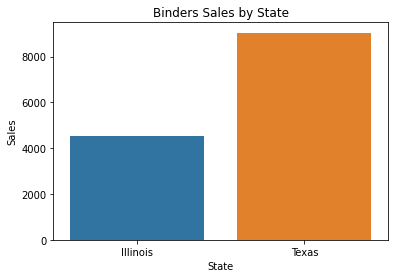

In [25]:
justBindersChart = justBindersChart[["State","Sales",]].groupby(by="State").sum()
justBindersChart = justBindersChart.reset_index()

#This line tells seaborn what to plot on the x axis & what to plot on the y axis, & which dataframe has the data
barchart1 = sns.barplot(x="State",y="Sales", data = justBindersChart)

#This line is a title attribute setting
barchart1.set_title("Binders Sales by State")

#Try adding plt.show if your graph isn't showing until your end execution or run other code
plt.show()

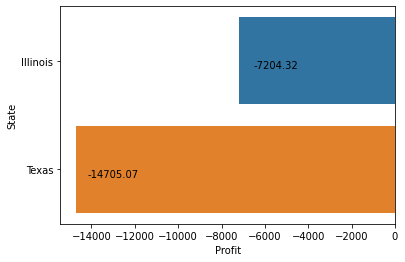

In [27]:
justBindersChart = justBindersUnprofit.copy()

#reset_index() is an important step for graphs when we've used .groupby
justBindersChart = justBindersChart.reset_index()

justBindersChart = justBindersChart[["State","Profit"]].groupby(by="State").sum()
justBindersChart = justBindersChart.reset_index()

#This line tells seaborn what to plot on the x axis & what to plot on the y axis, & which dataframe has the data
barchart1 = sns.barplot(x="Profit",y="State", data = justBindersChart)

for p in barchart1.patches:
    width = p.get_width()
    plt.text(1700+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.show()

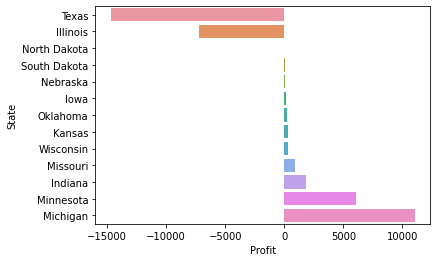

In [28]:
bindersStateProf = justBinders[["Segment","Region","State","Profit","Sales","Discount"]]
bindersStateProfit = bindersStateProf.loc[bindersStateProf["Region"]=="Central"]
bindersStateProfitSorted = bindersStateProfit.groupby(by="State").sum().sort_values(by="Profit")

bindersStateProfit = bindersStateProfit[["State","Profit"]].groupby(by="State").sum().sort_values(by="Profit")
bindersStateProfit = bindersStateProfit.reset_index()

barchart1 = sns.barplot(x="Profit",y="State", data = bindersStateProfit)

#CHART ANNOTATIONS
#for p in barchart1.patches:
#    width = p.get_width()
#    plt.text(3000+p.get_width(), p.get_y()+0.55*p.get_height(),
#             '{:1.2f}'.format(width),
#             ha='center', va='center')

plt.show()

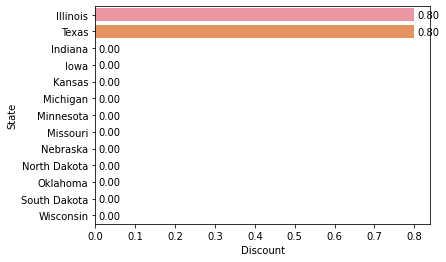

In [23]:
#DISCOUNT VS STATE CHART
bindersStateProf = justBinders[["Segment","Region","State","Profit","Sales","Discount"]]
bindersStateProfit = bindersStateProf.loc[bindersStateProf["Region"]=="Central"].sort_values(by="Discount")
bindersStateProfitSorted = bindersStateProfit.groupby(by="State").mean().sort_values(by="Discount")

bindersStateProfit = bindersStateProfit[["State","Discount"]].groupby(by="State").mean().sort_values(by="Discount", ascending=False)
bindersStateProfit = bindersStateProfit.reset_index()

barchart1 = sns.barplot(x="Discount",y="State", data = bindersStateProfit)

for p in barchart1.patches:
    width = p.get_width()
    plt.text(0.035+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
